# QuTiP example: Single-Qubit Dynamics without RWA

Basic structure of this notebook was borrowed from qubit dynamics tutorial of qutip homepage
Instructor : Prof. DKim

In [18]:
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt

In [20]:
import numpy as np

In [21]:
from qutip import *

In [22]:
options=Options(nsteps=20000)

def qubit_integrate(w0, vamp, wmw, g1, g2, solver):

    H0 = w0 / 2.0 * sigmaz() 
    H1 = vamp / 2.0 * sigmax()
    args={'wmw': wmw}
    H = [H0,[H1,'np.cos(wmw*t)']]
        
    # collapse operators
    c_ops = []

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
        
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops,args,options=options)  
    elif solver == "es":
        output = essolve(H, psi0, tlist, c_ops, e_ops,args,options=options)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, [sigmax(), sigmay(), sigmaz()],args,options=options)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

In [56]:
w0 = 10.0 * 2 * np.pi   # qubit frequency
vamp   = 1 * 2 * np.pi   # Rabi amplitude
wmw = 10.0 * 2 * np.pi   # driving frequency
g2 = 0.0
g1 = 0.0

# intial state
psi0 = basis(2,0)

tlist = np.linspace(0,3,1000)


In [57]:
import time
start_time = time.time()
sx1, sy1, sz1 = qubit_integrate(w0, vamp, wmw, g1, g2, "me")
print('time elapsed = ' + str(time.time() - start_time))

time elapsed = 11.363621473312378


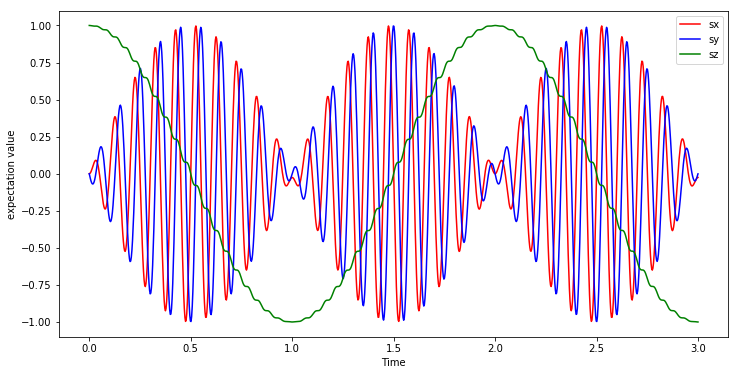

In [58]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx1), 'r')
ax.plot(tlist, np.real(sy1), 'b')
ax.plot(tlist, np.real(sz1), 'g')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

## Bloch sphere

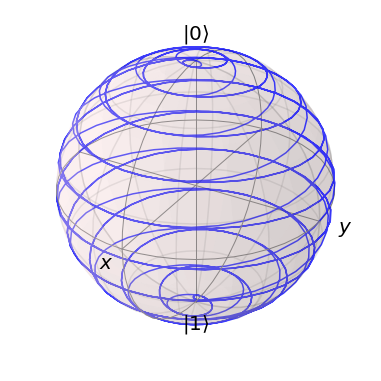

In [59]:
sphere=Bloch()
sphere.add_points([sx1,sy1,sz1], meth='l')
sphere.show()

## Versions

In [12]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.1
Numpy,1.15.1
SciPy,1.1.0
matplotlib,2.2.3
Cython,0.28.5
Number of CPUs,8
BLAS Info,INTEL MKL
IPython,6.5.0
Python,"3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]"
OS,nt [win32]
